#### IMPORTING MODULES

In [5]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import matplotlib
%matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import nltk
#stop-words
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))

import gensim
import string

# tokenizing
from nltk import word_tokenize,sent_tokenize 

#word2vec
from gensim.models import Word2Vec  

# corpus
from nltk.corpus import gutenberg



#### CREATING RANDOM SAMPLE TEXT

Here I am using a random text from the nltk corpora (or a random corpus)

In [20]:

'''nltk.download('gutenberg')
sample_text=gutenberg.raw('austen-emma.txt')
sample_text = (sample_text + " " + gutenberg.raw('shakespeare-hamlet.txt')).lower()
sample_text[:50]'''


sp = pd.read_csv(PATH + 'south_park.csv')
sp.groupby('Character').count().Line[sp.groupby('Character').count().Line > 2000]

#sp_clean = sp[(sp.Character == 'Cartman') | (sp.Character == 'Kyle')| (sp.Character == "Stan")].reset_index(drop = True)
sp_clean = sp[(sp.Character == 'Cartman') | (sp.Character == 'Kyle')].reset_index(drop = True)
sp_clean.groupby('Character').count().Line

sample_text = sp_clean.copy()

In [21]:
sample_text.head()  # we will use this to see.

,Season,Episode,Character,Line
0,10,1,Kyle,Going away? For how long?\n
1,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...
2,10,1,Kyle,"Draw two card, fatass.\n"
3,10,1,Cartman,"Reverse to you, Jew. \n"
4,10,1,Kyle,Yeah!\n


In [45]:
list_text = list(sample_text.Line)
list_text =''.join(list_text)


#### TOKENIZING THE TEXT (as required by the w2v model)

In [92]:
'''
tokenizing into sentences. 
we will further tokenize this in words and store evry sentence as a list item. 
thus we will have a list of list whreeach item is a list of words in a particular sentence. 
'''
nltk.download('punkt')
sentences=nltk.sent_tokenize(list_text.lower())
#print(sentences,"\n")
print("Number of sentences:",len(sentences))  # 9 sentences.

[nltk_data] Downloading package punkt to /home/typedoor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of sentences: 30881


In [93]:
token_sent=[]
for sent in sentences:
    sent.translate(string.punctuation)
    words=nltk.word_tokenize(sent)
    words=[w for w in words if w not in stop_words]
    token_sent.append(words)


In [94]:
#print(token_sent) list of list of words.
#each elemnt in main list is a sentence and in inner list is a word of corressponding sentence.
print(len(token_sent))
#print(token_sent)

30881


#### CREATING AND TRAINING THE MODEL ON OUR CORPUS

In [95]:
#For parameters of Word2Vec uncomment the following line:
Word2Vec?

Init signature:
Word2Vec(
    sentences=None,
    size=100,
    alpha=0.025,
    window=5,
    min_count=5,
    max_vocab_size=None,
    sample=0.001,
    seed=1,
    workers=3,
    min_alpha=0.0001,
    sg=0,
    hs=0,
    negative=5,
    cbow_mean=1,
    hashfxn=<built-in function hash>,
    iter=5,
    null_word=0,
    trim_rule=None,
    sorted_vocab=1,
    batch_words=10000,
    compute_loss=False,
    callbacks=(),
)
Docstring:     
Class for training, using and evaluating neural networks described in https://code.google.com/p/word2vec/

If you're finished training a model (=no more updates, only querying)
then switch to the :mod:`gensim.models.KeyedVectors` instance in wv

The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save()` and
:meth:`~gensim.models.word2vec.Word2Vec.load()` methods, or stored/loaded in a format
compatible with the original word2vec implementation via `wv.save_word2vec_format()`
and `Word2VecKeyedVectors.load_word2vec_format()`

In [108]:
w2v_model=Word2Vec(token_sent,size=10,min_count=3,window=3,sg=1,hs=0,seed=42,workers=8)

In [109]:
w2v_model.train(token_sent,total_examples=len(token_sent),epochs=10)

(957936, 1625360)


#### LIST OF WORDS IN VOCAB

In [110]:

# vocabulary 
vocab=list(w2v_model.wv.vocab)
print(len(vocab))
#print(vocab)

3876


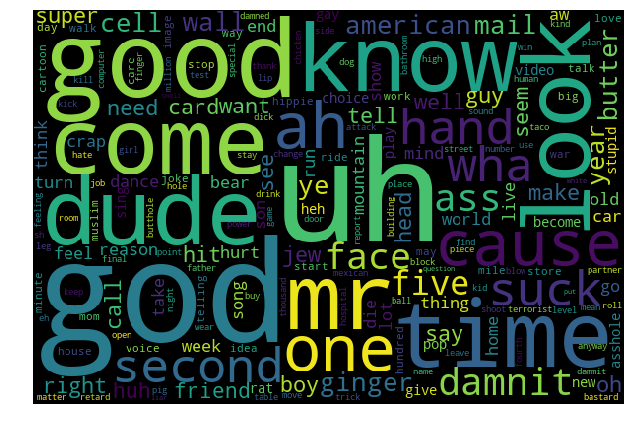

In [111]:
# visualizing our vocab with a word cloud.
from wordcloud import WordCloud
# Generate a word cloud image for positive reviews
str_str=''
for strings in vocab:
     str_str=str_str+strings+' '
wordcloud = WordCloud(width=600, height=400).generate(str_str)
plt.figure( figsize=(9,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

####  GETTING EMBEDDIING FOR A PARTICULAR WORD

In [112]:
# vector of a particular model. note that it is 100 dimensional as specified.
w2v_model.wv.get_vector('room')

array([ 0.6436504 , -0.07655519, -0.33652258, -0.6475424 ,  0.76025033,
        0.66721004,  0.02120542, -0.10183071,  1.4761899 ,  0.9870684 ],
      dtype=float32)

In [113]:
# can also do like this.
w2v_model.wv.word_vec('love')

array([-0.11174243,  0.5493225 , -1.5322826 ,  0.48520264,  0.09835444,
        0.74591357, -0.8157162 , -0.06410751,  0.5626069 , -0.17449646],
      dtype=float32)

#### MOST SIMILAR WORDS TO A GIVEN WORD

In [132]:
# most similar words to a given word
w2v_model.wv.most_similar('government',topn=20)

# also u can use
#w2v_model.wv.similar_by_word('Miss',topn=5)

[('computer', 0.9713517427444458),
 ('blast', 0.9575031995773315),
 ('lied', 0.9557918310165405),
 ('bigger', 0.9546644687652588),
 ('secrets', 0.9519338607788086),
 ('jerk', 0.9488338232040405),
 ('someday', 0.9469640254974365),
 ('specifically', 0.9461566805839539),
 ('elephant', 0.9459337592124939),
 ('start', 0.9451380968093872),
 ('kyyyle', 0.9445650577545166),
 ('rip', 0.9441959857940674),
 ('teach', 0.944135844707489),
 ('nuke', 0.944007396697998),
 ('mature', 0.9425577521324158),
 ('detective', 0.9414594173431396),
 ('steal', 0.9403055906295776),
 ('dwarf', 0.9393798112869263),
 ('wondering', 0.9393174052238464),
 ('peru', 0.9386642575263977)]

#### SIMALARITY b/w TWO GIVEN WORDS

In [128]:
# simalarity between two words
w2v_model.wv.similarity('apple','sad')

0.874362229480377

In [119]:
# simalarity between two words. dissimilar words
w2v_model.wv.similarity('mom','mommy')

0.8468078159316453

In [117]:
#simalarity between two SAME words
w2v_model.wv.similarity('mom','mom')

0.9999999999999999

#### SAVING AND LOADING THE MODEL.

In [87]:
# saving the model
w2v_model.save('w2v_model.pickle')
model = Word2Vec.load('w2v_model.pickle')

# summary of the word2vec model
print(model)
print(w2v_model)

# save_word2vec_format can also be used.

Word2Vec(vocab=1532, size=100, alpha=0.025)
Word2Vec(vocab=1532, size=100, alpha=0.025)


#### VISUALIZING USING t-SNE & PLOTLY (OPTIONAL, but FUN)

You will need an account at plotly and an API key

In [88]:
embed_matrix=[]
for word in vocab:
    embed_matrix.append(w2v_model.wv.get_vector(word))

In [89]:
from sklearn.manifold import TSNE
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.plotly as py

tsne = TSNE(n_components=2, random_state=42)
T = tsne.fit_transform(embed_matrix)
 
#get an account at plotly and use your signin/API credentials here
py.sign_in('mrc03', 'V3rVgtDnmk7m6JVkizOa')  # sign in on site before and generate API key.
 
# Create a trace
trace = go.Scatter(
    x = T[:,0],
    y = T[:,1],
    mode ='markers',
    text=list(w2v_model.wv.vocab)
)

data = [trace]

# Plot and embed in ipython notebook!
#IFrame(data, filename='basic-scatter')
py.iplot(data, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mrc03/0 or inside your plot.ly account where it is named 'basic-scatter'


/home/typedoor/anaconda3/envs/umc/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

